# <span class="bg-primary">26. STATISTIQUE INFERENTIELLE - R</span>

# <span class="bg-info">Screencast 1 : stats descs sur Essence</span>

In [ ]:
# On importe le fichier contenant les consommations d’essence
essence <- read.table("essence.txt",header=TRUE)

In [ ]:
# On calcule la moyenne, la variance et l’écart-type de l’échantillon

xbar <- mean(essence$conso)
round(xbar,digits=2)
## [1] 31.45

sprime <- sd(essence$conso)
round(sprime,digits=2)
## [1] 2.16

sprime2 <- var(essence$conso)
round(sprime2,digits=2)
## [1] 4.66

In [ ]:
# Si on souhaite obtenir la variance “biaisée”
n_essence <- dim(essence)[1]
v <- sprime2*(n_essence-1)/n_essence
round(v,digits=2)
## [1] 4.63

In [ ]:
# On peut visualiser l’histogramme 
hist(essence$conso,prob=TRUE,xlab="",ylab="",ylim=c(0, 0.25),
     main="Histogramme")


In [ ]:
# On peut visualiser sur cet histogramme la moyenne empirique
hist(essence$conso,prob=TRUE,xlab="",ylab="",ylim=c(0, 0.25),
     main="Histogramme")
abline(v=xbar,col="blue",lwd=3)
legend("topright",legend=("Moyenne empirique"),col="blue",lty=1,lwd=3)

In [ ]:
#  on peut visualiser sur cet histogramme la moyenne empirique et le seuil 
# “métier” (le seuil métier est la valeur sur laquelle souhaite communiquer le 
# constructeur : 31 litres au cent)
mu0 <- 31

hist(essence$conso,prob=TRUE,xlab="",ylab="",ylim=c(0, 0.25),main="Histogramme")
abline(v=xbar,col="blue",lwd=3)
abline(v=mu0,col="red",lwd=3)
legend("topright",legend=c("Moyenne empirique","Seuil testé"),
       col=c("blue","red"),lty=1,lwd=3)

In [ ]:
# On peut enfin superposer sur cet histogramme la densité gaussienne
hist(essence$conso,prob=TRUE,xlab="",ylab="",ylim=c(0, 0.25),
     main="Histogramme et densité normale")
curve(dnorm(x,mean=xbar,sd=sprime),col="red",lwd=2,add=TRUE,yaxt="n")

# <span class="bg-info">Screencast 2 : IC sur Guerison</span>

In [ ]:
# On importe le fichier contenant les guérisons ou non-guérisons
guerison <- read.table("guerison.txt",header=TRUE)

In [ ]:
# On peut estimer le taux de guérison théorique p
n_guerison <- dim(guerison)[1]
n_guerison_gueris <- sum(guerison$taux==1)

p_estim <- n_guerison_gueris/n_guerison

In [ ]:
# Si on lance “manuellement” les calculs au niveau de test 5%
alpha <- 0.05
icinf <- p_estim-qnorm(p=1-alpha/2)*sqrt(p_estim*(1-p_estim)/n_guerison)
round(icinf,digits=2)
## [1] 0.72

icsup <- p_estim+qnorm(p=1-alpha/2)*sqrt(p_estim*(1-p_estim)/n_guerison)
round(icsup,digits=2)
## [1] 0.83

In [ ]:
# En pratique, le data analyst peut obtenir simplement cet intervalle à l’aide 
# de la commande  prop.test  (cette commande lance d’autres calculs en sus de
# l’intervalle de confiance, on les verra plus tard)
alpha <- 0.05
prop.test(n_guerison_gueris,n_guerison,conf.level=1-alpha)

In [ ]:
## 
## 1-sample proportions test with continuity correction
## 
## data: n_guerison_gueris out of n_guerison, null probability 0.5
## X-squared = 63.375, df = 1, p-value = 1.709e-15
## alternative hypothesis: true p is not equal to 0.5
## 95 percent confidence interval:
## 0.7103413 0.8260184
## sample estimates:
## p 
## 0.7731481

In [ ]:
# On aurait également pu obtenir un intervalle de confiance “exact”, basé sur
# la loi binomiale, à l’aide de la commande  binom.test
alpha <- 0.05
binom.test(n_guerison_gueris,n_guerison,conf.level=1-alpha)

In [ ]:
## 
## Exact binomial test
## 
## data: n_guerison_gueris and n_guerison
## number of successes = 167, number of trials = 216, p-value =
## 2.925e-16
## alternative hypothesis: true probability of success is not equal to 0.5
## 95 percent confidence interval:
## 0.7114251 0.8272107
## sample estimates:
## probability of success 
## 0.7731481

In [ ]:
# Enfin, si on avait choisi un niveau de confiance plus faible, 1−α=90% par 
# exemple, on aurait obtenu un intervalle de confiance plus étroit
alpha <- 0.10
prop.test(n_guerison_gueris,n_guerison,conf.level=1-alpha)

In [ ]:
# 
## 1-sample proportions test with continuity correction
## 
## data: n_guerison_gueris out of n_guerison, null probability 0.5
## X-squared = 63.375, df = 1, p-value = 1.709e-15
## alternative hypothesis: true p is not equal to 0.5
## 90 percent confidence interval:
## 0.7206161 0.8185913
## sample estimates:
## p 
## 0.7731481

# <span class="bg-info">Screencast 3 : IC sur moyenne Essence</span>

In [ ]:
# Si on lance “manuellement” les calculs au niveau de test 5% :
alpha <- 0.05
icinf <- xbar-qt(p=1-alpha/2,df=n_essence-1)*sprime/sqrt(n_essence)
round(icinf,digits=2)
## [1] 31.07

icsup <- xbar+qt(p=1-alpha/2,df=n_essence-1)*sprime/sqrt(n_essence)
round(icsup,digits=2)
## [1] 31.83

In [ ]:
# En pratique, le data analyst peut utiliser la commande  t.test  pour obtenir
# cet intervalle de confiance :*
alpha <- 0.05
t.test(essence$conso,conf.level=1-alpha)

In [ ]:
##
## One Sample t-test
##
## data: essence$conso
## t = 164.74, df = 127, p-value < 2.2e-16
## alternative hypothesis: true mean is not equal to 0
## 95 percent confidence interval:
## 31.07169 31.82722
## sample estimates:
## mean of x
## 31.44945

# <span class="bg-info">Screencast 4 : IC sur variance Essence</span>

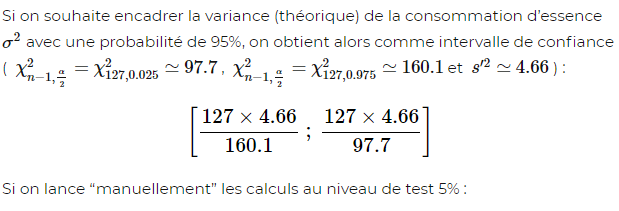

In [ ]:
alpha <- 0.05
icinf <- (n_essence-1)*sprime2/qchisq(p=1-alpha/2,df=n_essence-1)
round(icinf,digits=2)
## [1] 3.7

icsup <- (n_essence-1)*sprime2/qchisq(p=alpha/2,df=n_essence-1)
round(icsup,digits=2)
## [1] 6.06

In [ ]:
library(EnvStats)

In [ ]:
## 
## Attaching package: 'EnvStats'
## The following objects are masked from 'package:stats':
## 
## predict, predict.lm
## The following object is masked from 'package:base':
## 
## print.default

In [ ]:
alpha <- 0.05
varTest(essence$conso,conf.level=1-alpha)

In [ ]:
## 
## Results of Hypothesis Test
## --------------------------
## 
## Null Hypothesis: variance = 1
## 
## Alternative Hypothesis: True variance is not equal to 1
## 
## Test Name: Chi-Squared Test on Variance
## 
## Estimated Parameter(s): variance = 4.66481
## 
## Data: essence$conso
## 
## Test Statistic: Chi-Squared = 592.4309
## 
## Test Statistic Parameter: df = 127
## 
## P-value: 0
## 
## 95% Confidence Interval: LCL = 3.700708
## UCL = 6.063869

# <span class="bg-info">Screencast 5 : test sur Guerison</span>

In [ ]:
prop.test(x=167,n=216,p=0.75,alternative="greater")

In [ ]:
# test naissance garçon
prop.test(x=39284,n=781170,p=0.5,alternative="greater")

# Tester la moyenne (théorique) d'un échantillon

In [ ]:
alpha <- 0.05
t.test(essence$conso,mu=31,alternative="two.sided")

In [ ]:
## 
## Results of Hypothesis Test
## --------------------------
## 
## Null Hypothesis: mean = 31
## 
## Alternative Hypothesis: True mean is not equal to 31
## 
## Test Name: One Sample t-test
## 
## Estimated Parameter(s): mean of x = 31.44945
## 
## Data: essence$conso
## 
## Test Statistic: t = 2.354358
## 
## Test Statistic Parameter: df = 127
## 
## P-value: 0.02008833
## 
## 95% Confidence Interval: LCL = 31.07169
## UCL = 31.82722

# Tester la variance (théorique) d'un échantillon

In [ ]:
library(EnvStats)
alpha <- 0.05
varTest(essence$conso,sigma.squared=4.5,alternative="greater")

In [ ]:
## 
## Results of Hypothesis Test
## --------------------------
## 
## Null Hypothesis: variance = 4.5
## 
## Alternative Hypothesis: True variance is greater than 4.5
## 
## Test Name: Chi-Squared Test on Variance
## 
## Estimated Parameter(s): variance = 4.66481
## 
## Data: essence$conso
## 
## Test Statistic: Chi-Squared = 131.6513
## 
## Test Statistic Parameter: df = 127
## 
## P-value: 0.3706697
## 
## 95% Confidence Interval: LCL = 3.839436
## UCL = Inf

# Comparez deux échantillons gaussiens (test de comparaison)

In [ ]:
versi <- iris[iris$Species=="versicolor",]$Petal.Length
virgi <- iris[iris$Species=="virginica",]$Petal.Length

In [ ]:
# On teste tout d’abord l’égalité des variances à l’aide de la commande
# var.test  :
var.test(versi,virgi)

In [ ]:
## 
## Results of Hypothesis Test
## --------------------------
## 
## Null Hypothesis: ratio of variances = 1
## 
## Alternative Hypothesis: True ratio of variances is not equal to 1
## 
## Test Name: F test to compare two variances
## 
## Estimated Parameter(s): ratio of variances = 0.7249678
## 
## Data: versi and virgi
## 
## Test Statistic: F = 0.7249678
## 
## Test Statistic Parameters: num df = 49
## denom df = 49
## 
## P-value: 0.2637454
## 
## 95% Confidence Interval: LCL = 0.411402
## UCL = 1.277530

# La p-valeur valant 0.26, on ne rejette donc pas l’égalité des variances 
# au niveau de test 5%.

# On teste ensuite l’égalité des moyennes à l’aide de la command

In [ ]:
# On teste ensuite l’égalité des moyennes à l’aide de la commande  t.test
t.test(versi,virgi,var.equal=TRUE)

In [ ]:
## 
## Results of Hypothesis Test
## --------------------------
## 
## Null Hypothesis: difference in means = 0
## 
## Alternative Hypothesis: True difference in means is not equal to 0
## 
## Test Name: Two Sample t-test
## 
## Estimated Parameter(s): mean of x = 4.260
## mean of y = 5.552
## 
## Data: versi and virgi
## 
## Test Statistic: t = -12.60378
## 
## Test Statistic Parameter: df = 98
## 
## P-value: 3.17882e-22
## 
## 95% Confidence Interval: LCL = -1.495426
## UCL = -1.088574

In [ ]:
# On teste si les dés sont équilibrés 
n <- c(185,1149,3265,5475,6114,5194,3067,1331,403,105,14,4,0)
p0 <- dbinom(0:12,12,1/3)
chisq.test(n,p=p0)

In [ ]:
## Warning in chisq.test(n, p = p0): Chi-squared approximation may be
## incorrect

## 
## Results of Hypothesis Test
## --------------------------
## 
## Alternative Hypothesis: 
## 
## Test Name: Chi-squared test for given probabilities
## 
## Data: n
## 
## Test Statistic: X-squared = 41.31222
## 
## Test Statistic Parameter: df = 12
## 
## P-value: 4.344864e-05

In [ ]:
# Le test n’est pas valide car les effectifs ne sont pas suffisants pour les valeurs 10, 11 et 12. On agrège ces modalités et on relance les calculs
n <- c(185,1149,3265,5475,6114,5194,3067,1331,403,105,18)
p0 <- c(dbinom(0:9,12,1/3),sum(dbinom(10:12,12,1/3)))
chisq.test(n,p=p0)

In [ ]:
## 
## Results of Hypothesis Test
## --------------------------
## 
## Alternative Hypothesis: 
## 
## Test Name: Chi-squared test for given probabilities
## 
## Data: n
## 
## Test Statistic: X-squared = 35.4943
## 
## Test Statistic Parameter: df = 10
## 
## P-value: 0.0001027878

In [ ]:
# exemple de la consommation d'essence
# On peut tester l’adéquation de la consommation d’essence à une loi normale à l’aide de Kolmogorov-Smirnov
ks.test(essence$conso,"pnorm",mean=mean(essence$conso),sd=sd(essence$conso))

In [ ]:
## Warning in ks.test(essence$conso, "pnorm", mean = mean(essence$conso), sd
## = sd(essence$conso)): ties should not be present for the Kolmogorov-Smirnov
## test

## 
## Results of Hypothesis Test
## --------------------------
## 
## Alternative Hypothesis: two-sided
## 
## Test Name: One-sample Kolmogorov-Smirnov test
## 
## Data: essence$conso
## 
## Test Statistic: D = 0.04830966
## 
## P-value: 0.9262283

In [ ]:
# On aurait également pu lancer un test de Shapiro-Wilk :
shapiro.test(essence$conso)

In [ ]:
## 
## Results of Hypothesis Test
## --------------------------
## 
## Alternative Hypothesis: 
## 
## Test Name: Shapiro-Wilk normality test
## 
## Data: essence$conso
## 
## Test Statistic: W = 0.9871523
## 
## P-value: 0.2743285